C:\Users\abhay\AppData\Local\Temp\ipykernel_14028\1572428220.py:30: RuntimeWarning: overflow encountered in exp
  A = np.exp(Z) / np.sum(np.exp(Z), axis=0)
C:\Users\abhay\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\abhay\AppData\Local\Temp\ipykernel_14028\1572428220.py:30: RuntimeWarning: invalid value encountered in divide
  A = np.exp(Z) / np.sum(np.exp(Z), axis=0)


Iteration:  0
0.12370731707317073
Iteration:  10
0.09834146341463415
Iteration:  20
0.09834146341463415
Iteration:  30
0.09834146341463415
Iteration:  40
0.09834146341463415
Iteration:  50
0.09834146341463415
Iteration:  60
0.09834146341463415
Iteration:  70
0.09834146341463415
Iteration:  80
0.09834146341463415
Iteration:  90
0.09834146341463415
Prediction:  [0]
Label:  3


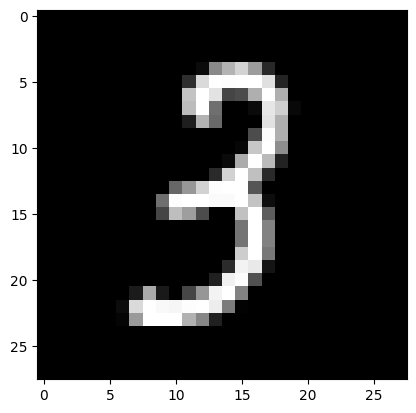

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('D:/Projects/AI_ML_SD_DA/Datasets/digit-recognizer/train.csv')

data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
y_dev = data_dev[0]
x_dev = data_dev[1:n]

data_train = data[1000:m].T
y_train = data_train[0]
x_train = data_train[1:n]

def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)
    
def softmax(Z):
    A = np.exp(Z) / np.sum(np.exp(Z), axis=0)
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max()+1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def deriv_ReLU(Z):
    return Z > 0
    
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    
    dZ2 = A2 - one_hot_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
    
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)
    
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, axis=0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

W1, b1, W2, b2 = gradient_descent(x_train, y_train, 100, 0.1)

def make_predictions(X, W1, b1, W2, b2):
    Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_predictions(index, W1, b1, W2, b2):
    current_image = x_dev[:, index, None]
    prediction = make_predictions(x_dev[:, index, None], W1, b1, W2, b2)
    label = y_dev[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28))*255
    plt.gray()
    plt.imshow(current_image, interpolation = 'nearest')
    plt.show()
    
test_predictions(22, W1, b1, W2, b2)